## Projections and Transformations

This notebook contains examples of defining a 3D shape (a cube), rotating it, and projecting onto a 2 dimensional plane. The final example animates the rotation of a cube through 360 degrees.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.animation import FuncAnimation
import math

1. Define a cube as its __vertices, edges, and faces__. The edges are defined by a start and end, in which the start and end is an index to a vertex.

In [2]:
cube_vertices = [[5,15,5],[15,15,5],[5,5,5],[15,5,5],
        [5,15,15],[15,15,15],[5,5,15],[15,5,15]]

cube_edges = [[0,1],[0,2],[1,3],[2,3],
        [4,5],[4,6],[5,7],[6,7],
        [0,4],[1,5],[2,6],[3,7]]

cube_faces = [[0,1,3,2],[1,5,7,3],[0,4,5,1],[4,5,7,6],[0,4,6,2],[6,7,3,2]]

face_colours = ['#00ff00','#00ffff','#0000ff','#ffff00','#ff00ff','#ff0000']

2. __View transforms__. Define a function that applies a __perspective projection__ transform or an __orthographic projection__. For the perspective transform, the focal length is equivalent to that of a camera, i.e. the distance from the lens to the image plane

In [3]:
def simple_perspective_transform(shape, focal_length=0.5):
    perspective_tfm = []
    for coord in shape:
        perspective_tfm.append([(coord[0]*focal_length)/coord[2],(coord[1]*focal_length)/coord[2]])
    return perspective_tfm


In [4]:
def orthographic_transform(shape):
    perspective_tfm = []
    for coord in shape:
        perspective_tfm.append([coord[0],coord[1]])
    return perspective_tfm

3. Define a function that __rotates__ a shape around the __y axis__ by a specified angle. The function expects the angle to be given in radians. 

In [5]:
def yaxis_rotation(shape, angle):
    rotation_tfm = []
    for coord in shape:
        x = (coord[0] * math.cos(angle)) + (coord[2] * math.sin(angle))
        y = coord[1]
        z = ((-1) * coord[0] * math.sin(angle)) + (coord[2] * math.cos(angle))
        rotation_tfm.append([x,y,z])
    return rotation_tfm

4. Define a function that _rotates__ a shape around the __x axis__ by a specified angle. The function expects the angle to be given in radians. 

In [6]:
def xaxis_rotation(shape, angle):
    rotation_tfm = []
    for coord in shape:
        x = coord[0] 
        y = (coord[1] * math.cos(angle)) - (coord[2]* math.sin(angle))
        z = (coord[1] * math.sin(angle)) + (coord[2] * math.cos(angle))
        rotation_tfm.append([x,y,z])
    return rotation_tfm

5. Define a function to __draw a shape__ given its vertices and edges

In [7]:
def draw_shape(shape_vertices, shape_edges, zorders):

    #Plot the vertices of the shape
    for coord in shape_vertices:
        plt.scatter(coord[0],coord[1],color='blue')

    #Draw the shape's edges
    for index,edge in enumerate(shape_edges):
        
        x = [shape_vertices[edge[0]][0],shape_vertices[edge[1]][0]]
        y = [shape_vertices[edge[0]][1],shape_vertices[edge[1]][1]]
        plt.plot(x,y,'-',color='red',zorder=zorders[index])
        

6. Define a function to __paint each face__ of the shape. This makes it easier to see the shape when rendered. A list of zorders is used to determine the order in which to draw each face, i.e. those further away from the viewer are drawn first.

In [8]:
def paint_faces(shape_vertices, shape_faces, zorders, face_colours, fig):

    ax = fig.gca()
    patches = []
    
    #Add the face in order of distance from the view (largest zorder)
    for index in zorders:    
        face = shape_faces[index]
     
        shape = Polygon(((shape_vertices[face[0]][0],shape_vertices[face[0]][1]), 
                              (shape_vertices[face[1]][0],shape_vertices[face[1]][1]), 
                              (shape_vertices[face[2]][0],shape_vertices[face[2]][1]), 
                              (shape_vertices[face[3]][0],shape_vertices[face[3]][1])),
                              fc=face_colours[index])
        shape.set_clip_box(ax.bbox)
        patches.append(shape)
        
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)


7. Get the relative __depth of each of the faces__ so that they can be rendered in the correct order, furthest to closest.

In [9]:
def get_zorder(shape_vertices, shape_features):
    
    zorders = []
    for feature in shape_features:
        sum = 0
        feature_points = len(feature)
        for i in range(0,feature_points):
            sum = sum + shape_vertices[feature[i]][2]
        mean_z = sum/feature_points
        zorders.append(mean_z)
        
    sorted_order = sorted(range(len(zorders)), key=lambda k: zorders[k])

    return sorted_order
        

8. Start with the cube defined at the start and __apply a view transform__ then draw the object.

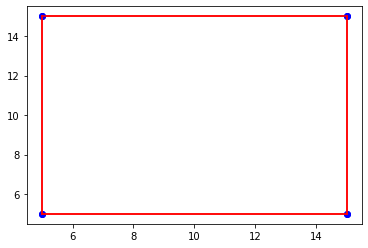

In [10]:
%matplotlib inline

pers_cube = orthographic_transform(cube_vertices)

zorders = get_zorder(cube_vertices, cube_edges)
draw_shape(pers_cube, cube_edges, zorders)

plt.show()

9. Draw the cube, but this time __paint the faces__.

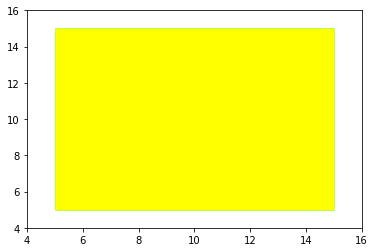

In [11]:
%matplotlib inline

fig, ax = plt.subplots()

zorders = get_zorder(cube_vertices, cube_faces)
paint_faces(pers_cube, cube_faces,  zorders, face_colours, fig)

min_x = min(pers_cube,key=lambda x: x[0])[0]-1
max_x = max(pers_cube,key=lambda x: x[0])[0]+1
min_y = min(pers_cube,key=lambda x: x[1])[1]-1
max_y = max(pers_cube,key=lambda x: x[1])[1]+1

ax.set_ylim(min_y, max_y)
ax.set_xlim(min_x, max_x)

plt.show()

10. Apply a __rotation around the x axis and the y axis__, and then __projection__ transform to display it as a 2 dimensional image.

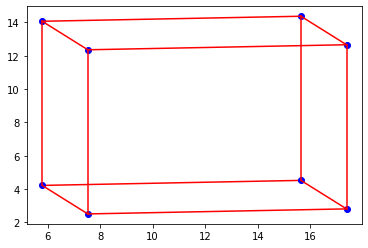

In [12]:
%matplotlib inline

xangle = math.radians(10)
yangle = math.radians(10)
yrot_cube = yaxis_rotation(cube_vertices,xangle)
xrot_cube = xaxis_rotation(yrot_cube,yangle)
#rotated_pers_cube = simple_perspective_transform(xrot_cube,10)
rotated_pers_cube = orthographic_transform(xrot_cube)

zorders = get_zorder(xrot_cube, cube_edges)
draw_shape(rotated_pers_cube, cube_edges, zorders)

11. Display the same view of the cube but this time __paint the faces in order of depth__.

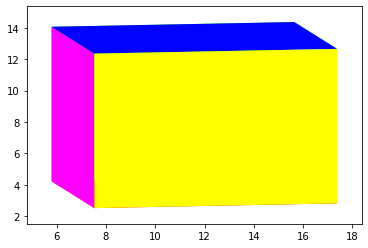

In [13]:
%matplotlib inline

fig, ax = plt.subplots()

zorders = get_zorder(xrot_cube, cube_faces)
paint_faces(rotated_pers_cube, cube_faces,  zorders, face_colours, fig)

min_x = min(rotated_pers_cube,key=lambda x: x[0])[0]-1
max_x = max(rotated_pers_cube,key=lambda x: x[0])[0]+1
min_y = min(rotated_pers_cube,key=lambda x: x[1])[1]-1
max_y = max(rotated_pers_cube,key=lambda x: x[1])[1]+1

ax.set_ylim(min_y, max_y)
ax.set_xlim(min_x, max_x)

plt.show()

12. __Animate the rotation of the cube__ using the matplotlib Animation class. In each frame, the object is rotated 1 degree around both the x and y axes. Paint the faces and show the edges also in the image.

In [14]:
def rotate_object(frame_num):
    
    fig.clear()
    
    yrotated_cube = yaxis_rotation(cube_vertices,math.radians(frame_num))
    xrotated_cube = xaxis_rotation(yrotated_cube,math.radians(frame_num))
    
    zorders = get_zorder(xrotated_cube, cube_faces)
    perspective_cube = orthographic_transform(xrotated_cube)
    paint_faces(perspective_cube, cube_faces, zorders, face_colours, fig)
    
    zorders = get_zorder(xrotated_cube, cube_edges)
    draw_shape(perspective_cube, cube_edges, zorders)
    

<IPython.core.display.Javascript object>


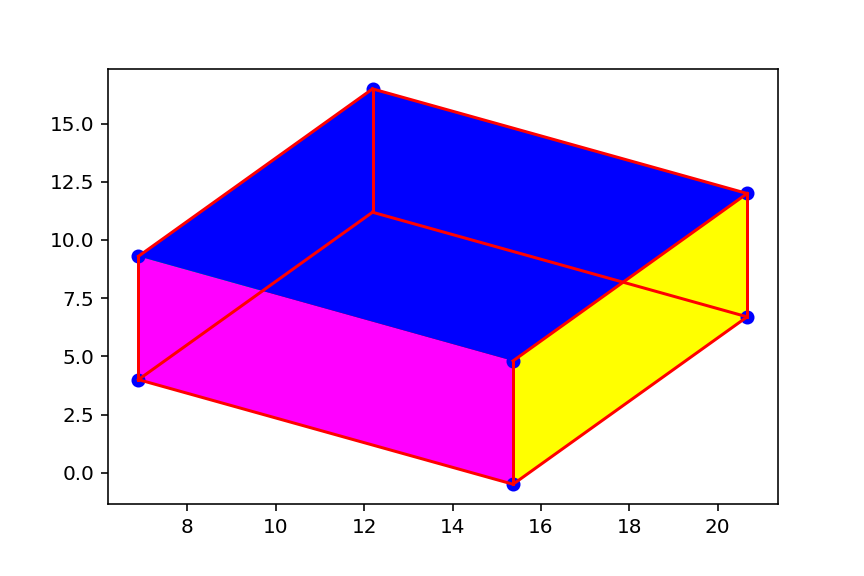

In [15]:
%matplotlib notebook
fig, ax = plt.subplots()
anim = FuncAnimation(fig, rotate_object, frames=360, interval=100)
plt.show()

13. Generate an __mpeg of the cube rotating__  around the x and y axes. The video is useful to analyse the rotation frame by frame. This is quite slow where there is a large number of frames.

In [16]:
%matplotlib notebook
from IPython import display
plt.ioff()
plt.rcParams['animation.ffmpeg_path']= '/usr/local/bin/ffmpeg'

In [17]:
fig, ax = plt.subplots()
anim = FuncAnimation(fig, rotate_object, frames=360, interval=100)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()